In [7]:
# Đỗ Công Danh 19146163
# Khai báo và sử dụng các thư viện sau
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

11501568/11490434 [==============================] - 0s 0us/step


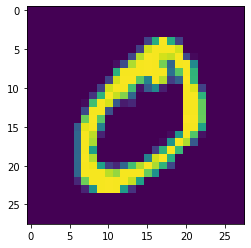

In [2]:
# Sử dụng tập dữ liệu MNIST với bộ dữ liệu đã chia giữa phần train là 60000 và phần test là 10000
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_train[1])
plt.show()

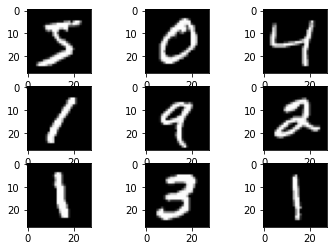

In [3]:
for i in range(9):
  plt.subplot(330+i+1) 
  plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype ('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [5]:
# Tạo mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 784 tín hiệu vào (784 hàng và 1 cột) và có 1024 tín hiệu ra sử dụng hàm relu
model.add(Dense(1024,activation='relu',input_shape=(784,)))
# Tạo lớp ẩn thứ hai với 1024 tín hiệu vào, 1024 tín hiệu ra (lấy tín hiệu vào là tín hiệu ra của lớp 1)
model.add(Dense(1024,activation='relu'))
# Tạo lớp ẩn thứ ba với 1024 tín hiệu vào, 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Biên dịch
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ dừng học ngay
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
375/375 [==============================] - 16s 38ms/step - loss: 0.2322 - accuracy: 0.9270 - val_loss: 0.1618 - val_accuracy: 0.9513
Epoch 2/500
375/375 [==============================] - 14s 37ms/step - loss: 0.0872 - accuracy: 0.9739 - val_loss: 0.1006 - val_accuracy: 0.9708
Epoch 3/500
375/375 [==============================] - 15s 39ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.1043 - val_accuracy: 0.9728
Epoch 4/500
375/375 [==============================] - 14s 38ms/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.1008 - val_accuracy: 0.9764
Epoch 5/500
375/375 [==============================] - 14s 38ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.1151 - val_accuracy: 0.9783
Epoch 6/500
375/375 [==============================] - 15s 39ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.1277 - val_accuracy: 0.9772
Epoch 7/500
375/375 [==============================] - 14s 38ms/step - loss: 0.0240 - accuracy: 0.9934 - val_loss: 0.1622 - val_ac

In [8]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 0.2538239061832428
Test accuary 0.9817000031471252


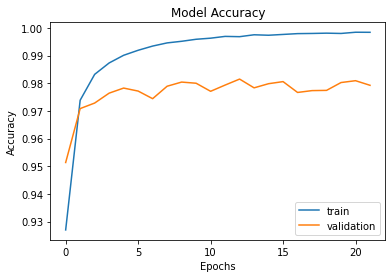

In [9]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()